In [459]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import math


px0=10; 
y0=2;


Nb=50;

tfin=Nb*(2*np.pi*np.sqrt(2*px0)); 
tstep=0.005;

Nt=np.int_(np.floor(tfin/tstep));

abeta=px0*y0/np.sqrt(2*px0); 
print("abeta is "+str(abeta)+"\n");
wr=2*px0*px0/np.sqrt(2*px0); 
print("wr is "+str(wr)+"\n   or "+str(wr*1.24/0.8)+" eV\n");
wc=3*abeta*px0*px0/np.sqrt(2*px0); 
print("wc is "+str(wc)+"\n   or "+str(wc*1.24/0.8)+" eV\n");
print("Nt is " +str(Nt)+"\n");
print("dt is " +str(tstep)+"\n");
def SaveAsH5(rank):
    
    tt = np.arange(Nt)*tstep
    
    px =  np.ones(Nt)*px0
    py = -np.sqrt(px0/2)*y0*np.sin(tt/np.sqrt(2*px0))
    pz =                  0*np.sin(tt/np.sqrt(2*px0))

    xx = np.arange(Nt)*np.sqrt(1-1/px0/px0)*tstep
    yy = y0*np.cos(tt/np.sqrt(2*px0))
    zz =  0*np.cos(tt/np.sqrt(2*px0))
        
    
    f = h5.File('Traj_%d_.h5'%rank,'w')
    for p in np.arange(1):
        grp = f.create_group('%d'%p)
        dset = grp.create_dataset("xx", (Nt,),data=xx)
        dset = grp.create_dataset("yy", (Nt,),data=yy)
        dset = grp.create_dataset("zz", (Nt,),data=zz)
        dset = grp.create_dataset("px", (Nt,),data=px)
        dset = grp.create_dataset("py", (Nt,),data=py)
        dset = grp.create_dataset("pz", (Nt,),data=pz)
        dset = grp.create_dataset("weight",(1,),data=1.0) #how many real unit charges it represents 
        dset = grp.create_dataset("start", (1,),data=0) # starting time of trajectory
         
    f.close()
    
    
for i in range(4):
     SaveAsH5(i)

abeta is 4.47213595499958

wr is 44.72135954999579
   or 69.31810730249347 eV

wc is 300.00000000000006
   or 465.00000000000006 eV

Nt is 280992

dt is 0.005



In [460]:
%%capture
rm Synchrotron_0000* ; mpiexec -n 4 SIRC 

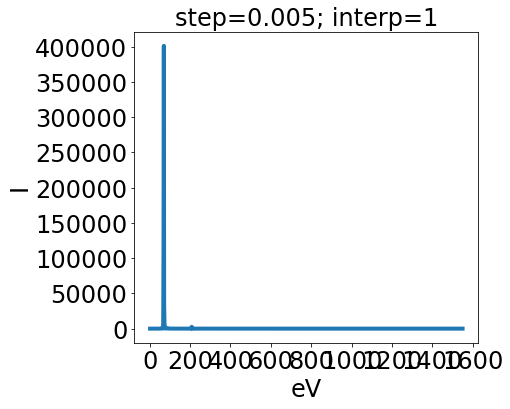

In [461]:
filename = 'Synchrotron_00004_.h5'
hf = h5.File(filename, 'r')
Ax = np.square(np.array(hf['Ax_R']))+np.square(np.array(hf['Ax_I']))
Ay = np.square(np.array(hf['Ay_R']))+np.square(np.array(hf['Ay_I']))
Az = np.square(np.array(hf['Az_R']))+np.square(np.array(hf['Az_I']))
eng = np.array(hf['Energy[eV]'])
I = Ay+Ax+Az



fig, ax = plt.subplots()

ax.plot(eng, (I[:,0,0,0]), linewidth=4.0)



for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(24)
ax.set_xlabel('eV', fontsize=24)
ax.set_ylabel('I', fontsize=24)
fig.tight_layout()
fig.set_size_inches(8, 6)
# ax.set(ylim=(0,np.max(I)*1.1),xlim=(0,2000))
# ax.set(ylim=(0.001,np.max(I)*2.1))
ax.set_title('step=%s; interp=1'%tstep, fontsize=24)
# ax.patch.set_alpha(0.0)
# ax.set_yscale('log')
plt.show()